In [89]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install --upgrade mplfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

In [95]:
df_2023_Ask = pd.read_csv("XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv")
df_2023_Bid = pd.read_csv("XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv")

In [96]:
df_2023 = df_2023_Bid.merge(df_2023_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

df_2023

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044
...,...,...,...,...,...,...,...,...,...,...,...
35215,2023.06.30 20:35:00,22.752,22.752,22.741,22.746,0.2752,22.782,22.782,22.771,22.776,1.8002
35216,2023.06.30 20:40:00,22.736,22.751,22.736,22.746,0.1410,22.775,22.781,22.775,22.776,0.7568
35217,2023.06.30 20:45:00,22.751,22.751,22.746,22.746,0.0690,22.781,22.781,22.776,22.776,0.4212
35218,2023.06.30 20:50:00,22.746,22.761,22.736,22.756,0.2160,22.776,22.797,22.774,22.786,0.6836


In [97]:

df_2023.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [98]:
file_obj2 = open('df_2023.csv', 'w')
df_2023.to_csv('df_2023.csv', encoding='utf-8', index=False)
file_obj2.close()

In [99]:
df = pd.read_csv('df_2023.csv', low_memory=False, sep=',')

In [100]:

df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

In [101]:
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]

In [102]:
data=df.drop(['Open_Ask','High_Ask' ,'Low_Ask' , 'Close_Ask' ], axis=1)

In [103]:
import datetime

In [104]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [105]:
data=data.drop(['Local time'],axis=1)

<Figure size 1200x500 with 0 Axes>

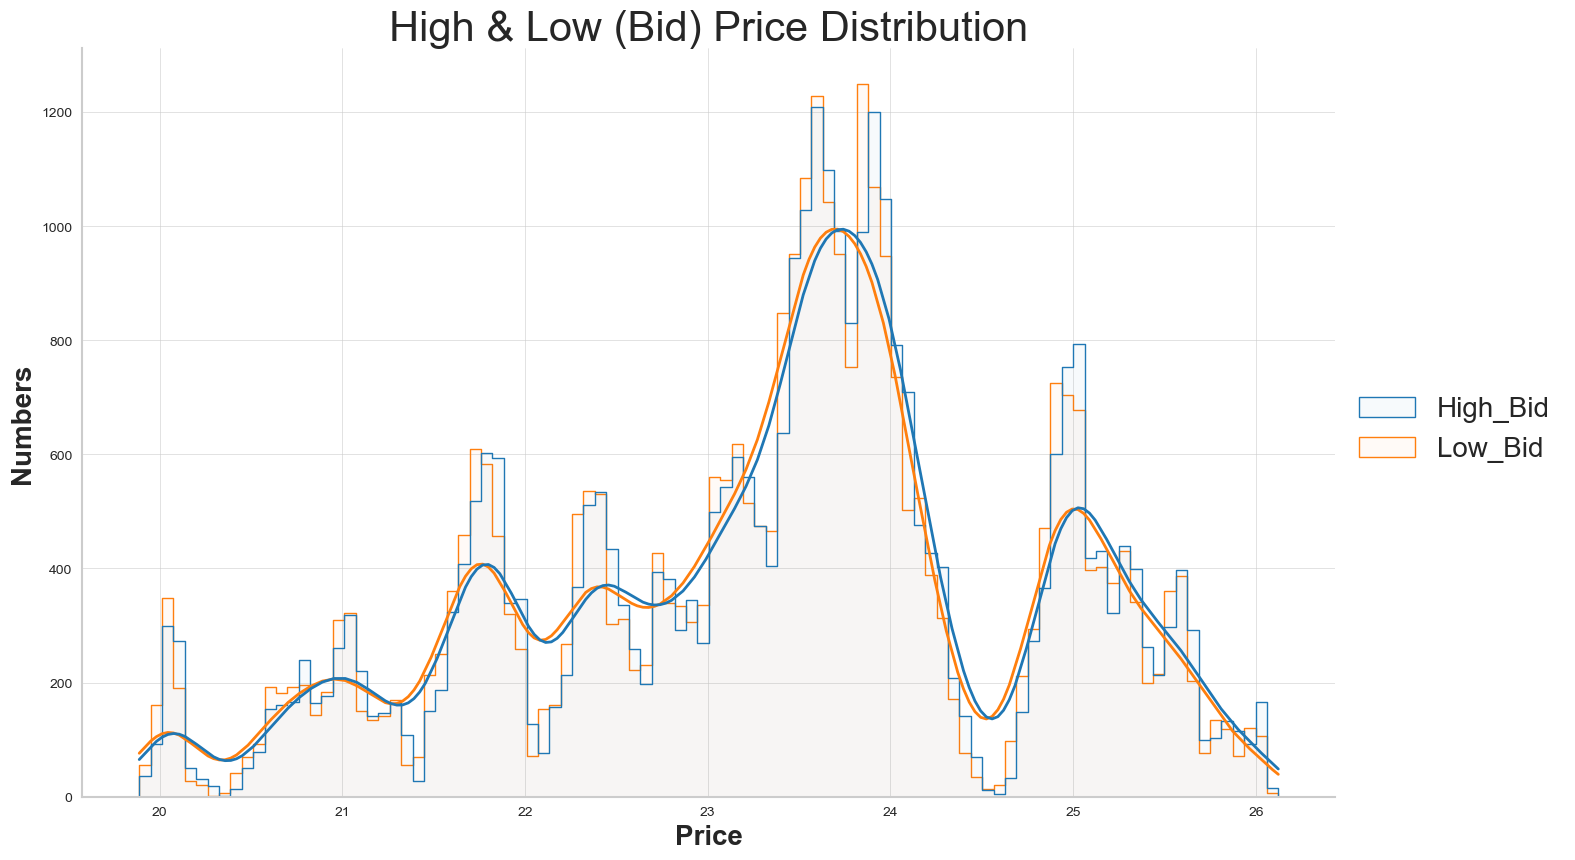

In [106]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show()

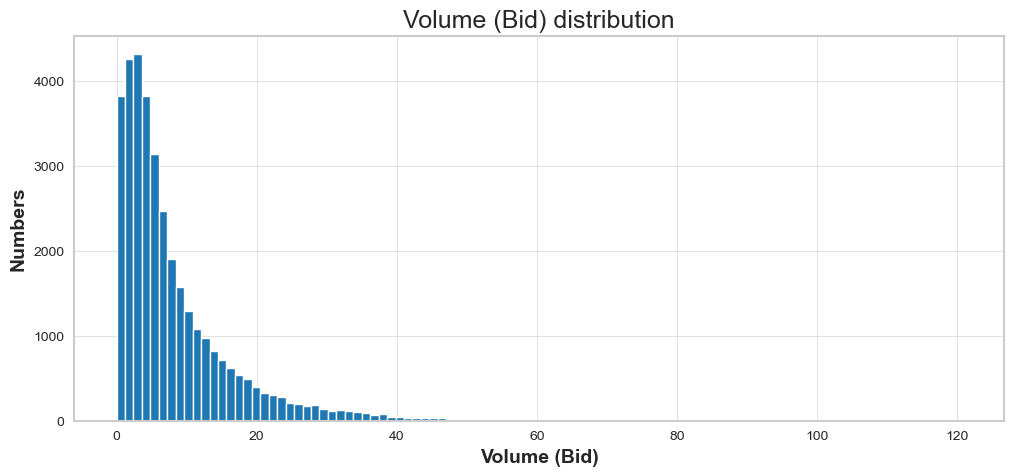

In [107]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14)
plt.show()

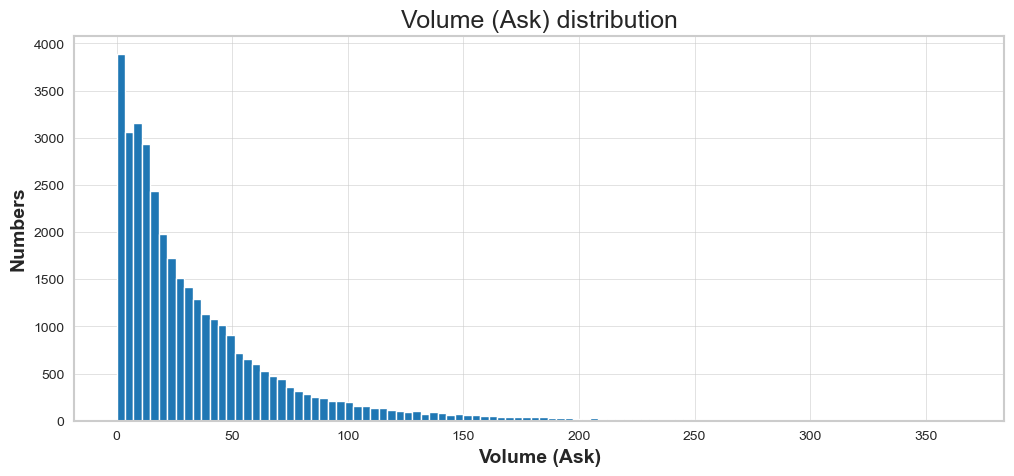

In [108]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Volume (Ask) distribution', size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Ask)',size=14)
plt.show()

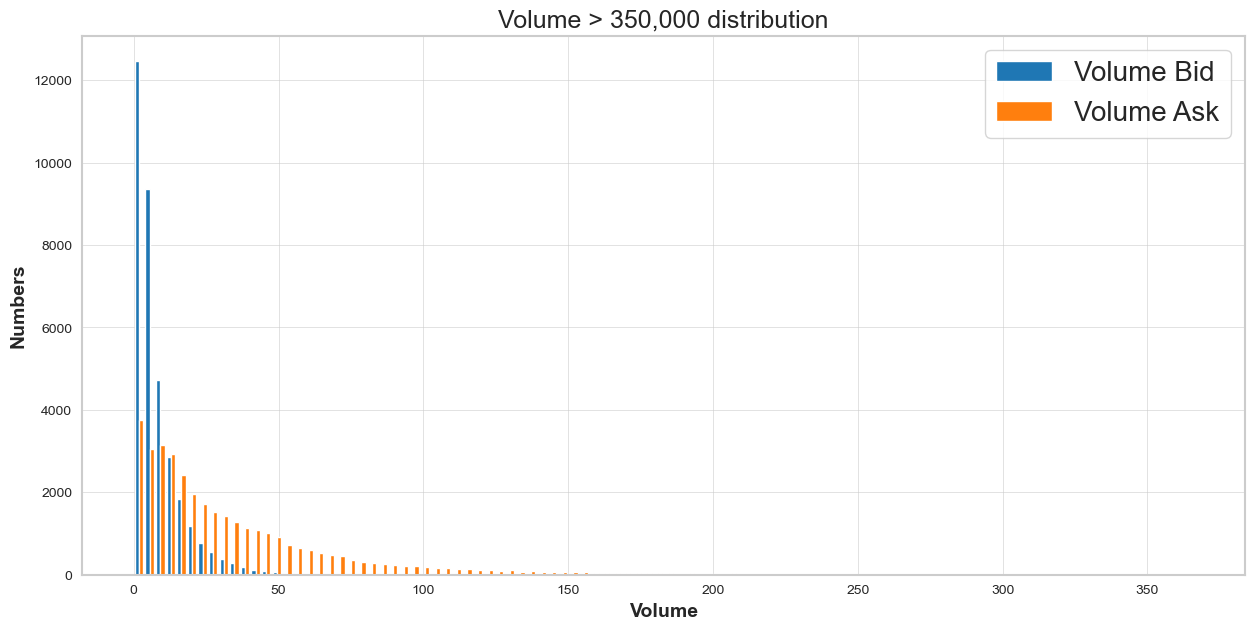

In [109]:
vol_350k = data[ (data['Volume_Bid' ] > 0.35) | (data['Volume_Ask' ] > 0.35) ]
plt.figure(num=1, figsize=(15,7))

plt.hist(vol_350k[ ['Volume_Bid' ,'Volume_Ask']], bins=100)
plt.legend(['Volume Bid', 'Volume Ask' ])
plt.title('Volume > 350,000 distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume',size=14)
plt.show()

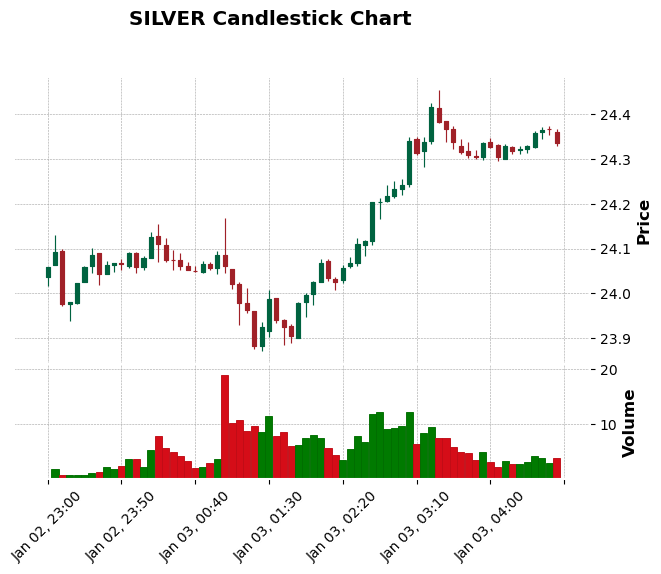

In [110]:
data_chart = data. set_index('Local_time_T', inplace=False)
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)
import mplfinance as mpf

data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume' ]
mpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title='SILVER Candlestick Chart', volume=True)

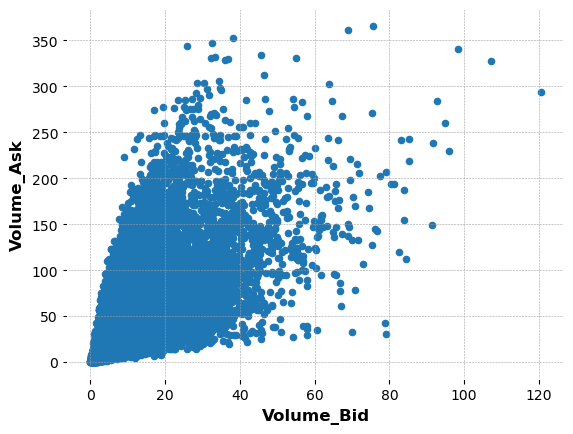

In [111]:
vol_350k.plot.scatter(x='Volume_Bid', y='Volume_Ask' )
plt.show()

In [112]:
data2 = data.drop(['Local_time_T'],axis=1)

In [113]:
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Bid'] + data2['Low_Delta']

In [114]:
data_length = len(data)
data_length

35220

In [115]:
train_size = int(round(data_length*0.8, -3))
train_size

28000

In [116]:
train =data2.iloc[:train_size]
train.shape

(28000, 14)

In [117]:
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

26.153

In [118]:
min_price = train['Low_Bid'].min()
min_price

19.888

In [119]:
max_volume = max(max(train['Volume_Bid']), max(train['Volume_Ask']))
max_volume

365.6322

In [120]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta

0.30900000000000105

In [121]:
max_Delta = round(max_Delta,3)
max_Delta

0.309

In [122]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta

0.0009999999999976694

In [123]:
min_Delta = round(min_Delta,3)
min_Delta

0.001

In [124]:
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

317.5858

In [125]:
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-48.7912

In [126]:
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

317.5858

In [127]:
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [128]:
data2['Open_Bid'] = ( data2['Open_Bid'] - min_price ) / (max_price-min_price)
data2['High_Bid']  = ( data2['High_Bid']  - min_price ) / (max_price-min_price)
data2['Low_Bid']   = ( data2['Low_Bid']   - min_price ) / (max_price-min_price)
data2['Close_Bid'] = ( data2['Close_Bid'] - min_price ) / (max_price-min_price)
data2['Y_High_Bid'] = ( data2['Y_High_Bid'] - min_price ) / (max_price-min_price)
data2['Y_Low_Ask']  = ( data2['Y_Low_Ask']  - min_price ) / (max_price-min_price)


In [129]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [130]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [131]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [132]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

In [133]:
columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 
                'Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']


In [134]:
for column in columns_float:
    data2[column] = pd.to_numeric(data2[column], downcast = 'float')

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35220 entries, 0 to 35219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          35220 non-null  float32
 1   High_Bid          35220 non-null  float32
 2   Low_Bid           35220 non-null  float32
 3   Close_Bid         35220 non-null  float32
 4   Volume_Bid        35220 non-null  float32
 5   Volume_Ask        35220 non-null  float32
 6   Volume_Delta      35220 non-null  float32
 7   Volume_Delta_abs  35220 non-null  float32
 8   Open_Delta        35220 non-null  float32
 9   High_Delta        35220 non-null  float32
 10  Low_Delta         35220 non-null  float32
 11  Close_Delta       35220 non-null  float32
 12  Y_High_Bid        35220 non-null  float32
 13  Y_Low_Ask         35220 non-null  float32
dtypes: float32(14)
memory usage: 1.9 MB


In [135]:
# Writing a normalised dataset to disk in file Silver_2023_normilised.csv

file_obj1 = open('Silver_2023_normilised.csv', 'w')
data2.to_csv('Silver_2023_normilised.csv', encoding='utf-8', index=False)
file_obj1.close()

In [136]:
data2 = pd.read_csv('Silver_2023_normilised.csv', low_memory = False, sep = ',')
data2.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Y_High_Bid,Y_Low_Ask
0,0.662091,0.665762,0.659058,0.665762,0.000952,0.000960,0.133180,0.000009,0.788961,0.788961,0.788961,0.788961,0.665762,0.669593
1,0.666560,0.677095,0.666560,0.671029,0.005048,0.003159,0.131287,0.002175,0.905844,0.814935,0.905844,0.844156,0.677095,0.671349
2,0.671349,0.671987,0.651876,0.652674,0.002470,0.002412,0.133115,0.000066,0.844156,0.840909,0.840909,0.840909,0.671987,0.659856
3,0.652674,0.653152,0.646449,0.653152,0.002445,0.002445,0.133172,0.000000,0.844156,0.847403,0.847403,0.847403,0.653152,0.654110
4,0.652833,0.660176,0.652514,0.660016,0.002429,0.002474,0.133217,0.000052,0.847403,0.844156,0.850649,0.840909,0.660176,0.660016


<Figure size 1200x500 with 0 Axes>

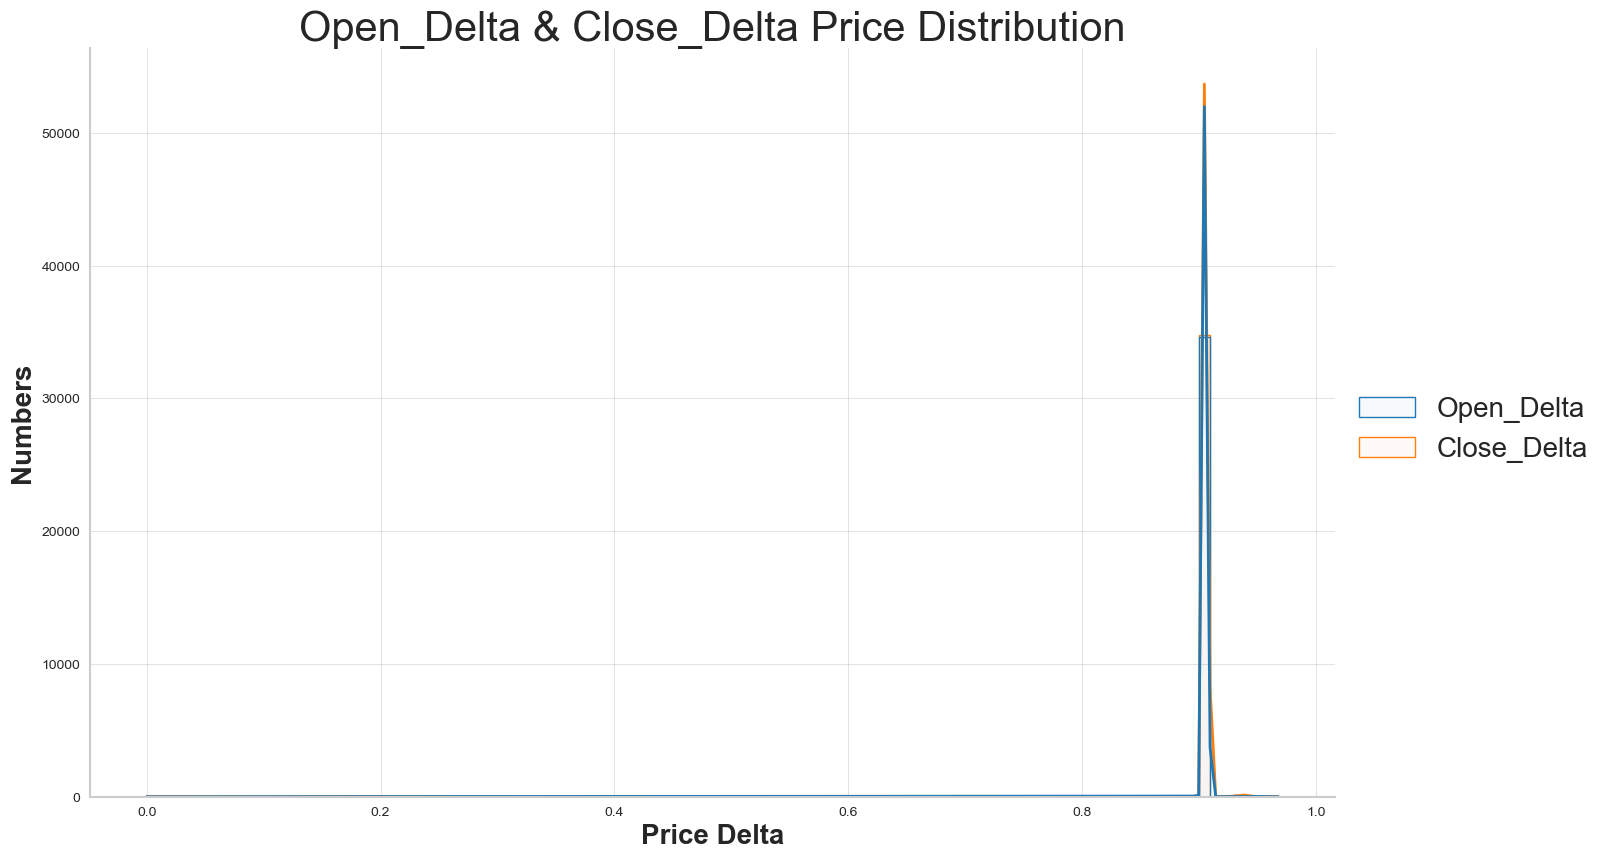

In [137]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data2[['Open_Delta', 'Close_Delta']],
            height=8,
            aspect=1.7,
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('Open_Delta & Close_Delta Price Distribution')
plt.xlabel('Price Delta', size= 20)
plt.ylabel('Numbers', size= 20)
plt.show();

In [138]:
n = data2.shape[0]
n

35220

In [139]:
n = data2.shape[0]
n

35220

In [140]:
p = data2.shape[1]
p

14

In [141]:
data_ax = data2.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [142]:
data_ay = data2[['Y_High_Bid', 'Y_Low_Ask']]

In [143]:
data_ay = data_ay.shift(-1)

In [144]:
# create new columns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [145]:
data_ay = data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'], axis =1)

In [146]:
# delete the 5 last rows in data_ay (because we don't have answers for the last 5 minutes)

for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)

In [147]:
# delete the last 5 rows in data_ax (because we don't have answers for the last 5 minutes)

for i in range(5):
    data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)

In [148]:
# Create inputs Numpy

data_a = np.array(data_ax) 

with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 

data_a:
[[6.6209e-01 6.6576e-01 6.5906e-01 6.6576e-01 9.5178e-04 9.5998e-04
  1.3318e-01 9.4463e-06 7.8896e-01 7.8896e-01 7.8896e-01 7.8896e-01]
 [6.6656e-01 6.7710e-01 6.6656e-01 6.7103e-01 5.0482e-03 3.1589e-03
  1.3129e-01 2.1752e-03 9.0584e-01 8.1494e-01 9.0584e-01 8.4416e-01]]


[[0.4541 0.4563 0.4533 0.4555 0.0053 0.0095 0.1374 0.0049 0.9058 0.9058
  0.9058 0.9058]
 [0.4555 0.4571 0.4551 0.4571 0.001  0.004  0.1362 0.0034 0.9058 0.9058
  0.9058 0.9058]]
numpy size: =  (35215, 12)
type:  float64


In [149]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.677095   0.65411013]
 [0.6724661  0.65411013]
 [0.6724661  0.65411013]]


[[0.45714286 0.45810056]
 [0.45857942 0.45985633]
 [0.4593775  0.46017557]]
numpy size: =  (35215, 2)
type:  float64


In [150]:
from tqdm import tqdm

In [151]:
n_small = 30000
N=50

L=n_small-N
t=data_a.shape[1]
print('Size of a three-dimensional inputs tensor: ', L,N,t)

Size of a three-dimensional inputs tensor:  29950 50 12


In [152]:
data_b = np.zeros( (L, N, t), dtype= 'float32' ) 

In [153]:
Y = np.zeros((L, 2), dtype= 'float32')

In [154]:
print('L = n_small - N - 5 = ', n_small-N-5, L)
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]  
    Y[k,1] = data_y[k+N-1,1]  
print(k) 
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 185519.06it/s]

29949
data_b: 
 [[[0.66209096 0.6657622  0.6590583  ... 0.78896105 0.78896105 0.78896105]
  [0.66656023 0.677095   0.66656023 ... 0.8149351  0.90584415 0.84415585]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  ...
  [0.69114125 0.6964086  0.6901836  ... 0.90584415 0.90584415 0.90584415]
  [0.6936951  0.6970471  0.6914605  ... 0.91883117 0.90584415 0.90584415]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 0.90584415 0.90584415]]

 [[0.66656023 0.677095   0.66656023 ... 0.8149351  0.90584415 0.84415585]
  [0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  [0.6526736  0.6531524  0.64644855 ... 0.8474026  0.8474026  0.8474026 ]
  ...
  [0.6936951  0.6970471  0.6914605  ... 0.91883117 0.90584415 0.90584415]
  [0.6952913  0.7122107  0.694174   ... 0.90584415 0.90584415 0.90584415]
  [0.7114126  0.7122107  0.7056664  ... 0.90584415 0.90584415 0.90584415]]

 [[0.67134875 0.67198724 0.6518755  ... 0.84090906 0.84090906 0.84090906]
  [0.6

In [155]:
import random

pp = random.randint(50, L) 
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  20458
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.84118116 		 0.84006387
0.84006387 		 0.83910614
0.83910614 		 0.83735037
0.83639264 		 0.83735037
0.83655226 		 0.83735037
0.83735037 		 0.83383876
0.83383876 		 0.8301676
0.8301676 		 0.82857144
0.82857144 		 0.8269753
0.82665604 		 0.8269753
0.82266563 		 0.8269753
0.8253791 		 0.8301676
0.8269753 		 0.83128494
0.8261772 		 0.83128494
0.82122904 		 0.8328811


In [156]:
data = []
data2 = []
data_ax = []
data_ay = []
data_a = []
data_y = []

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size = 0.1, shuffle = False, stratify = None, random_state =101)

In [159]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26955, 50, 12)
(26955, 2)
(2995, 50, 12)
(2995, 2)


In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential([

    LSTM(100, activation = 'relu', input_shape = (50, 12)),

    Dense(2)

])
print(model.summary())

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100)            │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,402 (177.35 KB)

 Trainable params: 45,402 (177.35 KB)

 Non-trainable params: 0 (0.00 B)

None


In [161]:
model.compile(optimizer = "adam", loss = "mse", metrics =["mae"])

In [162]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_LSTM_SILVER.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [163]:
history = model.fit(X_train, y_train, batch_size = 20, epochs = 20, validation_split = 0.1, shuffle = True, verbose =1, callbacks = [es,mc])

Epoch 1/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0131 - mae: 0.0374 
Epoch 1: val_loss improved from None to 0.00009, saving model to best_model_LSTM_SILVER.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - loss: 0.0024 - mae: 0.0136 - val_loss: 9.2017e-05 - val_mae: 0.0072
Epoch 2/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0503e-04 - mae: 0.0073 
Epoch 2: val_loss improved from 0.00009 to 0.00008, saving model to best_model_LSTM_SILVER.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - loss: 1.0646e-04 - mae: 0.0074 - val_loss: 7.7105e-05 - val_mae: 0.0063
Epoch 3/20
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3891e-05 - mae: 0.0069 
Epoch 3: val_loss improved from 0.00008 to 0.00007, saving model to best_model_LSTM_SILVER.keras
1213/1213 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - loss: 9.2598e-05 - mae: 0.0069 - val_loss: 6.6756e-05 - val_mae: 0.0057
Epoch 4/20
1211/1213 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.5826e-05 - mae: 0.0066 
Epoch 4

In [164]:
from keras import models
LSTM_saved_best_model = models.load_model('best_model_LSTM_SILVER.keras')

In [165]:
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7242e-05 - mae: 0.0035


In [166]:
scores

[2.7242389478487894e-05, 0.0034689726307988167]

In [167]:
print("Mean squared error (mse): %.9f " % (scores[0]))

Mean squared error (mse): 0.000027242 


In [168]:
print("Mean absolute error (mae): %.9f " % (scores[1]))

Mean absolute error (mae): 0.003468973 


In [169]:
plt.plot(history.history['loss'])
plt.xlabel('Mean Squared Error', size =14)

Text(0.5, 0, 'Mean Squared Error')

C:\Users\User\AppData\Local\Temp\ipykernel_13540\3564287169.py:9: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(num=1, figsize=(15,7))


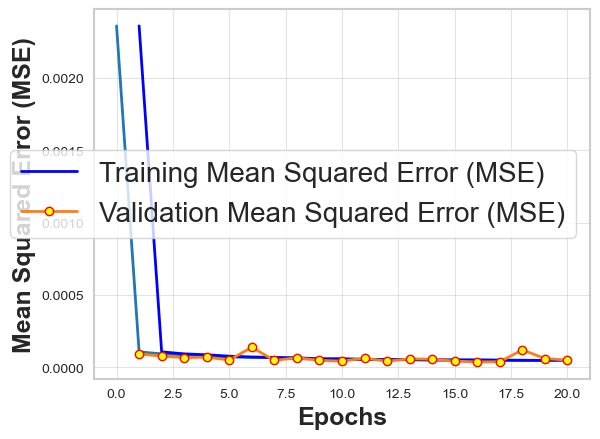

In [170]:
# More detailed MSE graph

history_dict = history.history

mse_values = history_dict['loss']
val_mse_values = history_dict['val_loss']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

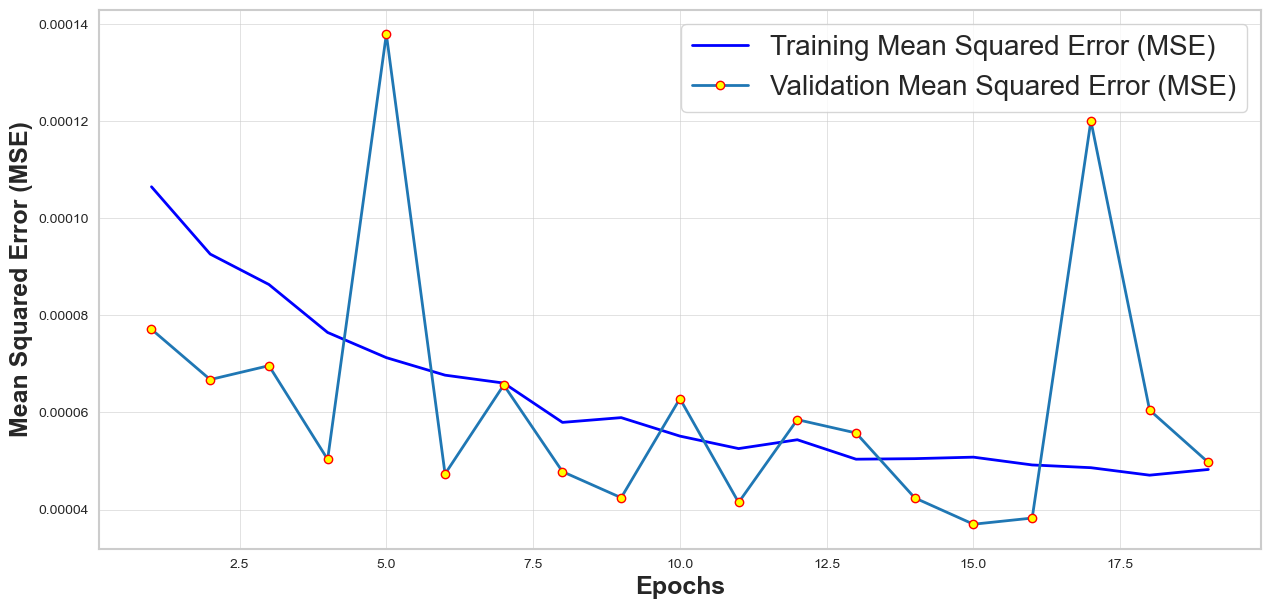

In [171]:
# deleted the 1st epoch
# to examine in detail the results of the remaining epochs

history_dict = history.history

mse_values = history_dict['loss'][1:]
val_mse_values = history_dict['val_loss'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'b', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

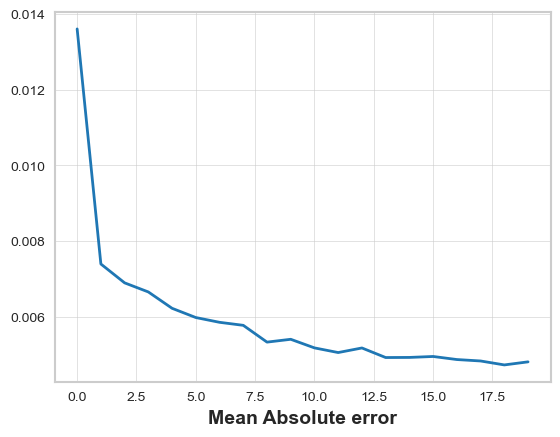

In [172]:
plt.plot(history.history['mae'])
plt.xlabel('Mean Absolute error', size=14)
plt.show()

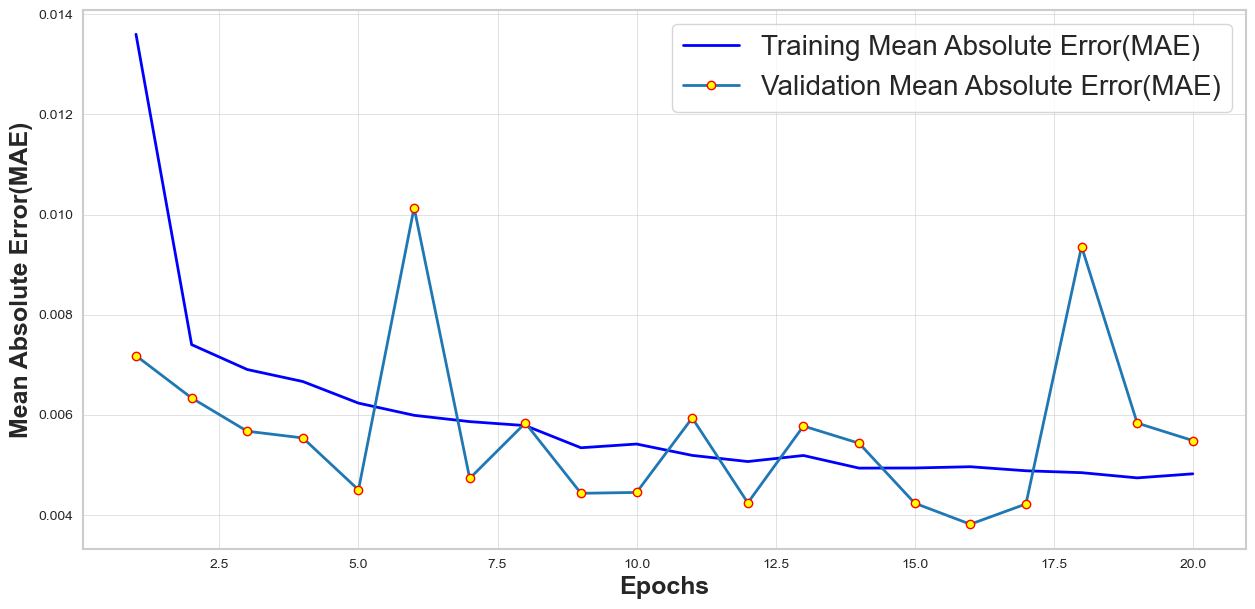

In [173]:
history_dict = history.history

mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'b', label='Training Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()
plt.show()

In [174]:
pred = LSTM_saved_best_model(X_test)
print(pred)

tf.Tensor(
[[0.6366805  0.63519526]
 [0.6361044  0.63452756]
 [0.637192   0.6356362 ]
 ...
 [0.5893175  0.5877532 ]
 [0.5892912  0.5878542 ]
 [0.5899735  0.58875835]], shape=(2995, 2), dtype=float32)


In [175]:
#max_price = 26.153
#min_price = 19.888